In [ ]:
ls

In [ ]:
import pandas as pd

In [ ]:
allrecords_cover= pd.read_csv('mapped_plant_quads_co_allrecords_cover.csv')

In [ ]:
allrecords_density = pd.read_csv('mapped_plant_quads_co_allrecords_density.csv')

In [ ]:
daily_climate = pd.read_csv('mapped_plant_quads_co_daily_climate.csv')

In [ ]:
quad_info = pd.read_csv('mapped_plant_quads_co_quad_info.csv')

In [ ]:
quad_inventory = pd.read_csv('mapped_plant_quads_co_quad_inventory.csv')

In [ ]:
quad_stocking_rate = pd.read_csv('mapped_plant_quads_co_quad_stocking_rate.csv')

In [ ]:
species_list = pd.read_csv('mapped_plant_quads_co_species_list.csv')

In [ ]:
species_name_changes = pd.read_csv('mapped_plant_quads_co_species_name_changes.csv')

A plot of the area covered by each species over all quadrats (y) for each year (x).

In [ ]:
allrecords_cover

In [ ]:
species_year_plot = allrecords_cover.groupby(['species','year'], as_index = False).area.sum()

In [ ]:
species_year_plot

In [ ]:
species_year_p = species_year_plot.pivot(index = 'year', columns = 'species', 
                             values = 'area')

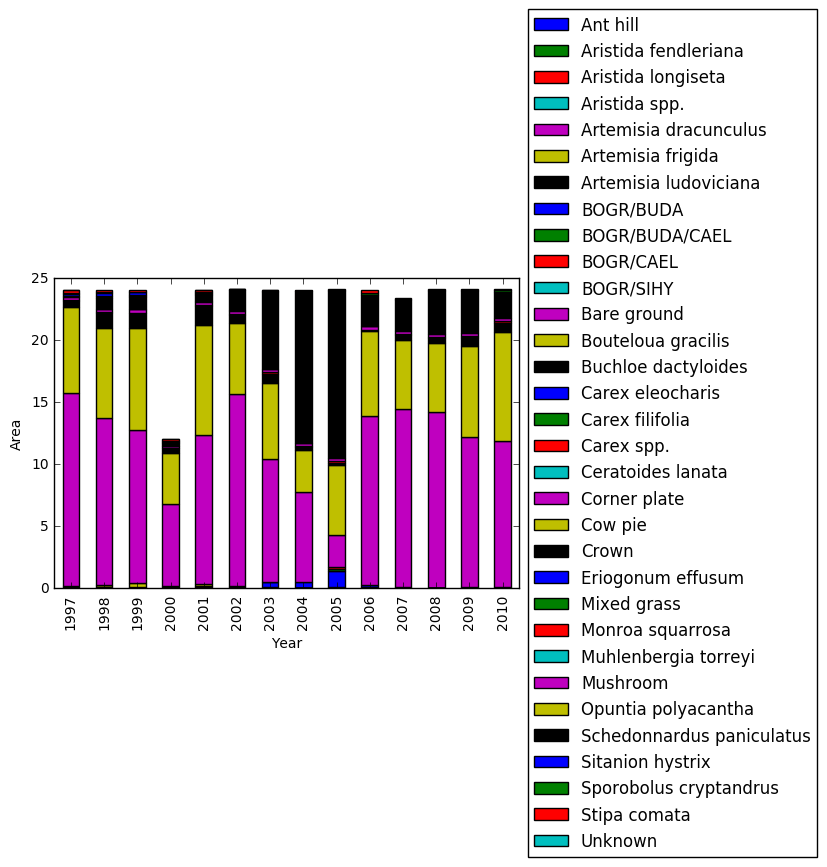

In [36]:
%matplotlib inline
species_year_f = species_year_p.plot(kind = 'bar', stacked = True, legend = True)
species_year_f.set_xlabel("Year")
species_year_f.set_ylabel("Area")
species_year_f.legend(loc='center left', bbox_to_anchor=(1,0.5))

This graph shows, within each year, the area taken by each species. The bare ground seems to have the most area. This means most of the area is free of plants. There also seems to be a lack of species evenness within each year. There are a few species that dominant the area.

A plot of the area covered by each growth-form over all quadrats (y) for each year (x).

In [ ]:
species_list.columns

In [ ]:
GF_cover_merged = pd.merge(left = allrecords_cover, right = species_list, left_on = 'species',
                       right_on = 'species')

In [ ]:
GF_cover_merged.columns

In [ ]:
GF_cover_merged

In [ ]:
GF_year_plot = GF_cover_merged.groupby(['growthform','year'], as_index = False).area.sum()

In [ ]:
GF_year_plot

In [ ]:
GF_year_p = GF_year_plot.pivot(index = 'year', columns = 'growthform', 
                             values = 'area')

In [ ]:
GF_year_p

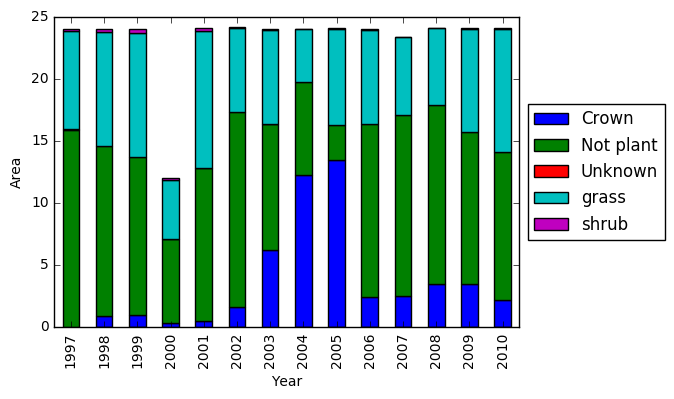

In [37]:
%matplotlib inline
GF_year_f = GF_year_p.plot(kind = 'bar', stacked = True, legend = True)
GF_year_f.set_xlabel("Year")
GF_year_f.set_ylabel("Area")
GF_year_f.legend(loc='center left', bbox_to_anchor=(1,0.5))

This graph shows, within each year, the area each growthform takes up. It seems that the crown plants increased in area starting from 2002 to 2005. They take a dip in the following year, 2006, and stay around that level till 2010.

A plot of the area covered by each growth-form over all quadrats (y) as a function of the mean precipitation for the year (x).

In [ ]:
G3 = pd.merge(left = GF_cover_merged, right = daily_climate, left_on = 'year',
                       right_on = 'year')

In [30]:
G3

In [31]:
G3_year = G3.groupby('year', as_index = False).precip.mean()

In [32]:
G3_year

,year,precip
0,1997,1.543701
1,1998,0.964534
2,1999,1.649775
3,2000,0.694447
4,2001,0.882880
5,2002,0.559414
6,2003,0.978355
7,2004,0.843191
8,2005,1.303524
9,2006,1.013762


In [33]:
G3_LM = pd.merge(left = GF_cover_merged, right = G3_year, left_on = 'year',
                       right_on = 'year')
G3_LM

,quad,year,species,area,x,y,density,cover,growthform,longevity,precip
0,gzgz_11,1997,Corner plate,0.001863,0.021345,0.977800,NaN,1299.0,Not plant,Not plant,1.543701
1,gzgz_11,1997,Corner plate,0.002010,0.972418,0.982564,NaN,1299.0,Not plant,Not plant,1.543701
2,gzgz_11,1997,Corner plate,0.003450,0.024583,0.033874,NaN,1299.0,Not plant,Not plant,1.543701
3,gzgz_11,1997,Corner plate,0.003378,0.972815,0.030933,NaN,1299.0,Not plant,Not plant,1.543701
4,gzgz_19,1997,Corner plate,0.002868,0.021446,0.968131,NaN,1299.0,Not plant,Not plant,1.543701
5,gzgz_19,1997,Corner plate,0.003742,0.967859,0.970509,NaN,1299.0,Not plant,Not plant,1.543701
6,gzgz_19,1997,Corner plate,0.002425,0.024165,0.022314,NaN,1299.0,Not plant,Not plant,1.543701
7,gzgz_19,1997,Corner plate,0.003147,0.972697,0.028092,NaN,1299.0,Not plant,Not plant,1.543701
8,gzgz_24,1997,Corner plate,0.002358,0.980925,0.969117,NaN,1299.0,Not plant,Not plant,1.543701
9,gzgz_24,1997,Corner plate,0.002738,0.021836,0.030868,NaN,1299.0,Not plant,Not plant,1.543701


In [ ]:
G3_LM_final = G3_LM.groupby(['precip','growthform'], as_index = False).area.sum()
G3_LM_final

In [41]:
G3_HI = G3_LM_final.pivot(index = 'precip', columns = 'growthform', 
                             values = 'area')

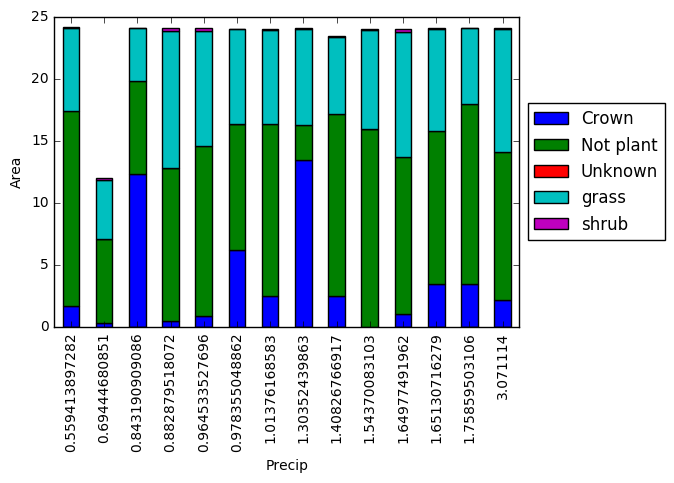

In [42]:
%matplotlib inline
G3plot = G3_HI.plot(kind = 'bar', stacked = True, legend = True)
G3plot.set_xlabel("Precip")
G3plot.set_ylabel("Area")
G3plot.legend(loc='center left', bbox_to_anchor=(1,0.5))

This growth shows the amount of precipitation on the x-axis and area on the y-axis. The growthforms are plotted and we want to check whether or not precipitation had an affect on the area each growthform obtained each year. This graph seems to show no correlation between precipitation and the area taken by each growthform.

At least one additional plot investigating the relationship between plant composition (e.g. species or growth form) and another variable.

In [35]:
lastgraph = G3_LM.groupby(['precip','species'], as_index = False).area.sum()
lastgraph

,precip,species,area
0,0.559414,Ant hill,0.003034
1,0.559414,Aristida longiseta,0.114108
2,0.559414,Artemisia frigida,0.069046
3,0.559414,Bare ground,15.453416
4,0.559414,Bouteloua gracilis,5.712241
5,0.559414,Buchloe dactyloides,0.704190
6,0.559414,Carex spp.,0.084948
7,0.559414,Ceratoides lanata,0.003357
8,0.559414,Corner plate,0.239654
9,0.559414,Cow pie,0.020105


In [43]:
lastgraph_p = lastgraph.pivot(index = 'precip', columns = 'species', 
                             values = 'area')

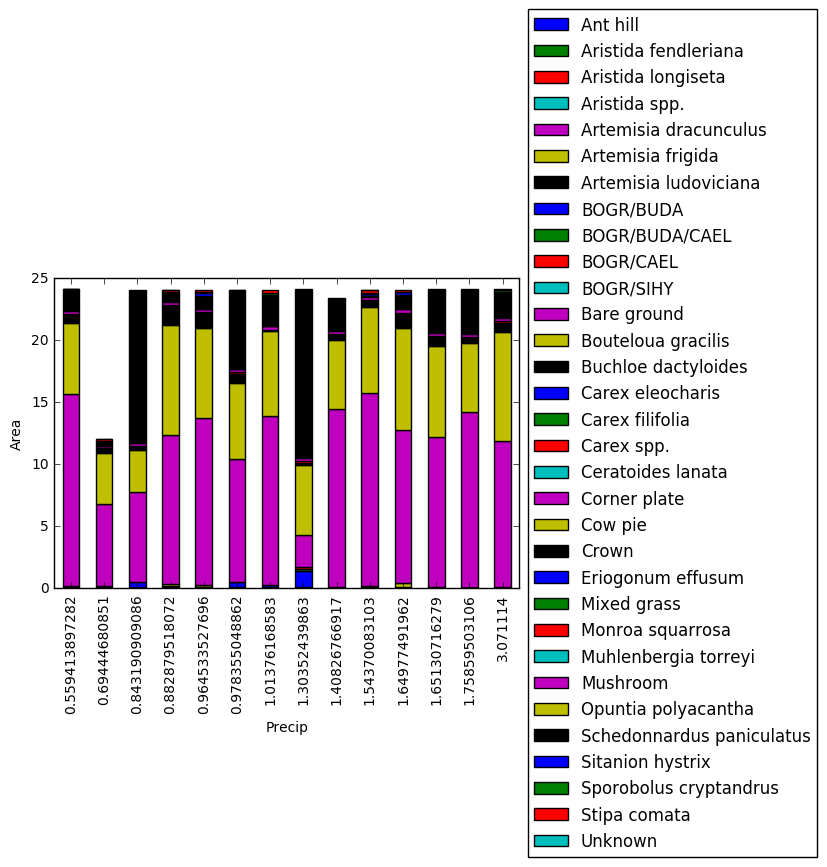

In [44]:
%matplotlib inline
lastgraph_F = lastgraph_p.plot(kind = 'bar', stacked = True, legend = True)
lastgraph_F.set_xlabel("Precip")
lastgraph_F.set_ylabel("Area")
lastgraph_F.legend(loc='center left', bbox_to_anchor=(1,0.5))

I made this graph to see whether or not precipitation may affect the species and the area they obtain. I chose to do this because I thought by clumping these species into growthforms that may not be telling the whole story and hopefully I could see how precipitation affects each species. Same as the last graph I believe that this graph does not show any correlation between species and precipitation.